In [6]:
from sqlalchemy import create_engine
import pandas as pd
# Conexion a Base de Datos Postgres
POSTGRES_ADDRESS = 'postgresdb'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = '12345'
POSTGRES_DBNAME= "postgres"
connection_format = "postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}"
postgres_str = connection_format.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME)
cnn = create_engine(postgres_str)

pd.read_sql_query('select * from bees limit 15;', cnn)

,program,year,period,state,ansi,affected_by,pct_of_colonies_impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL
5,SURVEY,2019,JAN THRU MAR,Alabama,1,Varroa_mites,27.2,AL
6,SURVEY,2018,JAN THRU MAR,Alabama,1,Disease,1.9,AL
7,SURVEY,2018,JAN THRU MAR,Alabama,1,Other,8.6,AL
8,SURVEY,2018,JAN THRU MAR,Alabama,1,Pesticides,14.9,AL
9,SURVEY,2018,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,30.2,AL


<AxesSubplot:title={'center':'California 2015'}, xlabel='affected_by'>

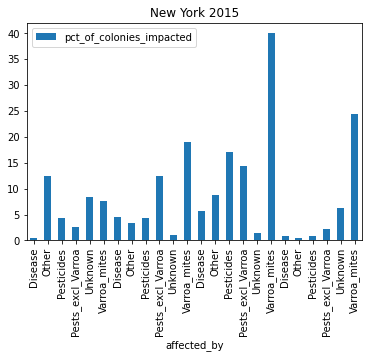

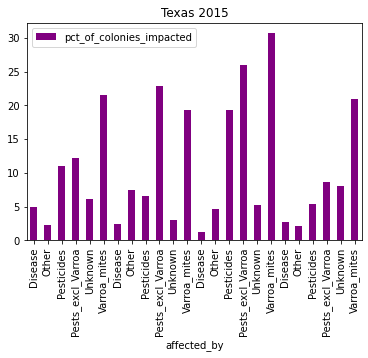

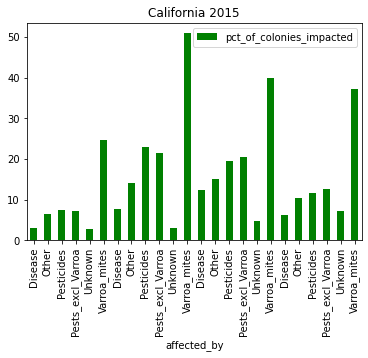

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_sql_query('select * from bees;', cnn)
newyork = df[(df["state"] == "New York") & (df["year"]==2015)]
texas = df[(df["state"] == "Texas") & (df["year"]==2015)]
california= df[(df["state"] == "California") & (df["year"]==2015)]

newyork.plot.bar(x="affected_by", y=["pct_of_colonies_impacted"],title="New York 2015")
texas.plot.bar(x="affected_by", y=["pct_of_colonies_impacted"],title="Texas 2015", color="purple")
california.plot.bar(x="affected_by", y=["pct_of_colonies_impacted"],title="California 2015", color="green")